# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></div><div class="lev1 toc-item"><a href="#Test-Pandas-and-Scikit-learn" data-toc-modified-id="Test-Pandas-and-Scikit-learn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test Pandas and Scikit-learn</a></div><div class="lev1 toc-item"><a href="#Test-Biopython" data-toc-modified-id="Test-Biopython-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test Biopython</a></div>

# Import Libraries

In [2]:
# tab data analysis library
import pandas as pd
# biological sequence analysis library
from Bio.Seq import Seq
# plotting library
import matplotlib.pyplot as plt
# machine learning library
from sklearn import datasets

# Test Pandas and Scikit-learn

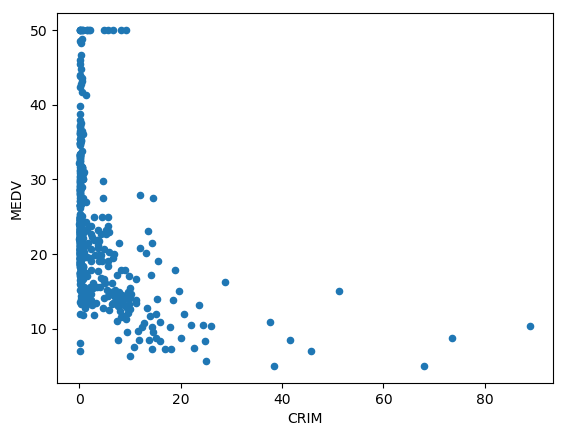

In [3]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']
boston_df.plot(x='CRIM', y='MEDV', kind='scatter');

# Test Biopython

In [4]:
Seq("GAATTCGGATCCTCTAGA").reverse_complement()

Seq('TCTAGAGGATCCGAATTC')

# List project ideas

1. Translate DNA seq --> RNA --> protein (DONE)

2. Read fasta file (~DONE, CAN ONLY DO IF FILE IS IN SAME DIRECTORY)

3. Parse read fasta (same as #2)

4. Align

5. Align groups

6. Make gene trees

7. RNA folding

8. Find a Longest Common Subsequence of Two Strings (like 2 DNA seqs)

9. Given an arbitrary protein sequence, determine its lifetime inside the cell using the relationships defined in the "N-end rule". Extend this to different cell types. https://en.wikipedia.org/wiki/N-end_rule

10. https://fasta.bioch.virginia.edu/biol4230/labs/accessions_hwk5.html

11. build chess computer!

12. things to include above
 - define function(s)
 - use for loop(s)
 - use classes in a meaningful way
 - API
 - make a package

In [5]:
#1
def dna_to_rna_and_protein(dna: str) -> str:
  # First, we need to convert the DNA string to RNA
  rna = dna.replace('T', 'U')
  
  # Next, we'll initialize an empty protein string
  protein = ""
  
  # Here is the codon to amino acid mapping dictionary
  codon_to_amino_acid_mapping = {
    "UUU": "F",    "CUU": "L",    "AUU": "I",    "GUU": "V",
    "UUC": "F",    "CUC": "L",    "AUC": "I",    "GUC": "V",
    "UUA": "L",    "CUA": "L",    "AUA": "I",    "GUA": "V",
    "UUG": "L",    "CUG": "L",    "AUG": "M",    "GUG": "V",
    "UCU": "S",    "CCU": "P",    "ACU": "T",    "GCU": "A",
    "UCC": "S",    "CCC": "P",    "ACC": "T",    "GCC": "A",
    "UCA": "S",    "CCA": "P",    "ACA": "T",    "GCA": "A",
    "UCG": "S",    "CCG": "P",    "ACG": "T",    "GCG": "A",
    "UAU": "Y",    "CAU": "H",    "AAU": "N",    "GAU": "D",
    "UAC": "Y",    "CAC": "H",    "AAC": "N",    "GAC": "D",
    "UAA": "STOP", "CAA": "Q",    "AAA": "K",    "GAA": "E",
    "UAG": "STOP", "CAG": "Q",    "AAG": "K",    "GAG": "E",
    "UGU": "C",    "CGU": "R",    "AGU": "S",    "GGU": "G",
    "UGC": "C",    "CGC": "R",    "AGC": "S",    "GGC": "G",
    "UGA": "STOP", "CGA": "R",    "AGA": "R",    "GGA": "G",
    "UGG": "W",    "CGG": "R",    "AGG": "R",    "GGG": "G"
  }
  
  # We'll loop through the RNA string three letters at a time
  for i in range(0, len(rna), 3):
    # Each group of three letters is called a codon
    codon = rna[i:i+3]

    # If the codon is not complete (i.e. if it's less than 3 letters long), we'll skip it
    if len(codon) < 3:
      continue
    
    # We'll use the dictionary to map the codons to their corresponding amino acids
    amino_acid = codon_to_amino_acid_mapping[codon]
    
    # If the amino acid is "STOP", we'll stop translating the RNA
    if amino_acid == "STOP":
      break
    
    # Otherwise, we'll add the amino acid to the protein string
    protein += amino_acid
  
  return rna, protein

dna = "ATGC"
rna_and_protein = dna_to_rna_and_protein(dna)
print(rna_and_protein)

('AUGC', 'M')


In [11]:
#2

from typing import Dict

def read_fasta(fasta_file: str) -> Dict[str, str]:
  sequences = {}
  with open(fasta_file, 'r') as f:
    # opens the FASTA file and reads it line by line
    # uses a dictionary to store the sequences, mapping the ID of each sequence to the sequence itself
    current_id = None
    current_seq = ""
    for line in f:
      line = line.strip()
      if line.startswith(">"):
      # If a line starts with ">", it indicates the start of a new sequence, and the function stores the previous sequence (if there was one) and updates the current ID and sequence
        if current_id:
          sequences[current_id] = current_seq
        current_id = line[1:]
        current_seq = ""
      else:
      # If the line doesn't start with ">", it is assumed to be part of the current sequence, and it is added to the current sequence string
        current_seq += line
    if current_id:
      sequences[current_id] = current_seq
  return sequences
  # the function returns the dictionary of sequences

read_fasta('gene.fna')

{'NC_000017.11:c7687490-7668421 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17]': 'CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAGTCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGGGGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGTTGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCTAGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGTGCTGGGCGTAGGGAATCCCTGAAATAAAAGATGCACAAAGCATTGAGGTCTGAGACTTTTGGATCTCGAAACATTGAGAACTCATAGCTGTATATTTTAGAGCCCATGGCATCCTAGTGAAAACTGGGGCTCCATTCCGAAATGATCATTTGGGGGTGATCCGGGGAGCCCAAGCTGCTAAGGTCCCACAACTTCCGGACCTTTGTCCTTCCTGGAGCGATCTTTCCAGGCAGCCCCCGGCTCCGCTAGATGGAGAAAATCCAATTGAAGGCTGTCAGTCGTGGAAGTGAGAAGTGCTAAACCAGGGGTTTGCCCGCCAGGCCGAGGAGGACCGTCGCAATCTGAGAGGCCCGGCAGCCCTGTTATTGTTTGGCTCCACATTTACATTTCTGCCTCTTGCAGCAGCATTTCCGGTTTCTTTTTGCCGGAGCAGCTCACTATTCACCCGATGAGAGGGGAGGAGAGAGAGAGAAAATGTCCTTTAGG

In [17]:
#3

def parse_fna(filename):
    """Parses a .fna file and returns a list of sequences."""
    with open(filename) as f:
        # read the contents of the file
        contents = f.read()

    # split the contents into a list of lines
    lines = contents.split('\n')

    # parse the lines into a list of sequences
    sequences = []
    current_sequence = ''

    for line in lines:
        if line.startswith('>'):
            # this is a new sequence
            sequences.append(current_sequence)
            current_sequence = ''
        else:
            # this is part of the current sequence
            current_sequence += line

    # don't forget to add the last sequence
    sequences.append(current_sequence)

    return sequences

parse_fna('gene.fna')

'CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAGTCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGGGGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGTTGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCTAGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGTGCTGGGCGTAGGGAATCCCTGAAATAAAAGATGCACAAAGCATTGAGGTCTGAGACTTTTGGATCTCGAAACATTGAGAACTCATAGCTGTATATTTTAGAGCCCATGGCATCCTAGTGAAAACTGGGGCTCCATTCCGAAATGATCATTTGGGGGTGATCCGGGGAGCCCAAGCTGCTAAGGTCCCACAACTTCCGGACCTTTGTCCTTCCTGGAGCGATCTTTCCAGGCAGCCCCCGGCTCCGCTAGATGGAGAAAATCCAATTGAAGGCTGTCAGTCGTGGAAGTGAGAAGTGCTAAACCAGGGGTTTGCCCGCCAGGCCGAGGAGGACCGTCGCAATCTGAGAGGCCCGGCAGCCCTGTTATTGTTTGGCTCCACATTTACATTTCTGCCTCTTGCAGCAGCATTTCCGGTTTCTTTTTGCCGGAGCAGCTCACTATTCACCCGATGAGAGGGGAGGAGAGAGAGAGAAAATGTCCTTTAGGCCGGTTCCTCTTACTTGGCAGAGGGAGGCTGCTATTCTCCGCCTGCATTTCTTTTTCTGGATTACTTAGTTATGGCCTTTGCAAAGGCAGGGG

In [19]:
#4

from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# define the reference sequence and the sequence read
reference = parse_fna('gene.fna')[1]
read = parse_fna('gene.fna')[2]

# align the sequences using the Smith-Waterman algorithm
alignments = pairwise2.align.localxs(reference, read, -2, -1)

# print the alignment
print(format_alignment(*alignments[0]))
